<a href="https://colab.research.google.com/github/DrumDong/Kaggle_Dacon_Project/blob/master/Ted/Ted_Regression_1th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, skew # 수치해석 기능(확률분포) 제공
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

df = train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/ted.csv')

In [63]:
df.head()

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views
0,1,1164,4553,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,"['children', 'creativity', 'culture', 'dance',...",47227110
1,2,977,265,544,139,62,58,258,113,443,413,132,56,268,116,131,203,"['alternative energy', 'cars', 'climate change...",3200520
2,3,1286,124,964,45,183,60,104,78,395,230,166,27,146,230,54,142,"['computers', 'entertainment', 'interface desi...",1636292
3,4,1116,200,760,291,32,59,105,36,53,380,1070,132,460,230,35,85,"['MacArthur grant', 'activism', 'business', 'c...",1697550
4,5,1190,593,3202,1390,942,318,110,72,67,5433,2893,4606,3736,2542,248,61,"['Africa', 'Asia', 'Google', 'demo', 'economic...",12005869


In [64]:
df.columns

Index(['video_num', 'duration', 'comments', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring', 'tags', 'views'],
      dtype='object')

video_num: 강연을 구분하기 위한 번호 (필요 없는 데이터)

duration: 강연의 길이. 시간의 단위는 초

comments: 시청자들의 댓글/감상평 수

Funny: 연사가 재미있었다는 평의 수

Beautiful: 강연이 아름다웠다는 평의 수

Indeginous: 연사가 똑똑해 보였다는 평의 수

Courageous: 연사가 용기를 줬다는 평의 수

Longwinded: 연사가 말을 장황하게 했다는 평의 수

Confusing: 강연 내용이 혼란스러웠다는 평의 수

Informative: 강연 내용이 유익했다는 평의 수

Fascinating: 강연 내용이 매력적이었다는 평의 수

Unconvincing: 강연 내용이 납득이 잘 안간다는 평의 수

Persuasive: 강연이 설득력 있었다는 평의 수

Jaw-dropping: 강연 내용이 놀라웠다는 평의 수

OK: 강연 내용이 만족스러웠다는 평의 수

Obnoxious: 강연 내용이 불쾌했다는 평의 수

Inspiring: 강연 내용이 동기부여적이었다는 평의 수

tags: 강연을 구분짓기 위한 태그들 (범주형 데이터)

**views: 시청자들이 강연을 시청한 횟수 (예측해야할 종속변수)**

In [65]:
df.shape

(2550, 19)

In [66]:
train['video_num'].values # 필요없는 데이터임 지우자.

array([   1,    2,    3, ..., 2548, 2549, 2550])

In [0]:
x=df.drop(['video_num','views','tags'],axis=1) # 'tags' 변수의 활용방안을 생각할 필요가 있을 듯.
y=df['views']

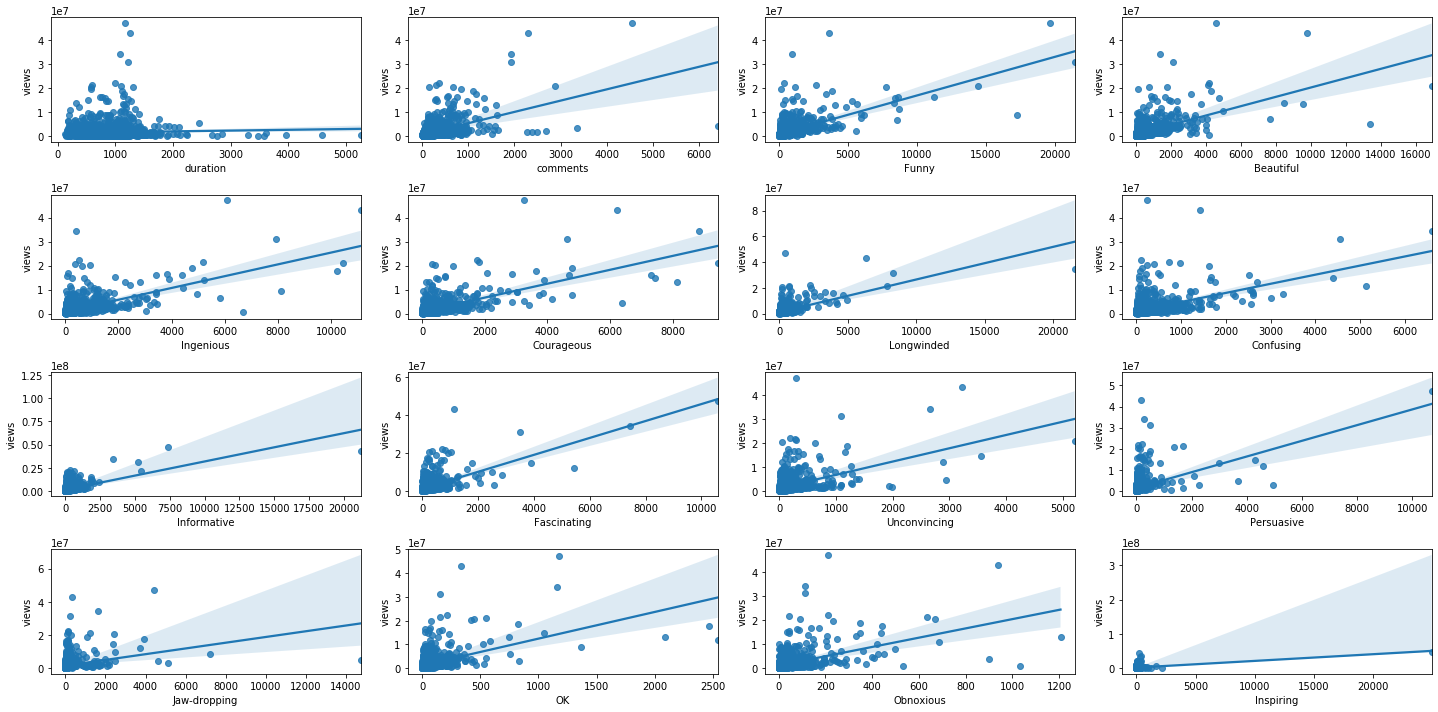

In [68]:
fig, axs = plt.subplots(figsize=(20,10),ncols=4,nrows=4)
lm_featrues = ['duration', 'comments', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring']
for i, feature in enumerate(lm_featrues):
  row = int(i/4)
  col = i%4

  sns.regplot(x=feature,y='views',data=df,ax=axs[row][col])
plt.tight_layout()

In [0]:
# train, test(모델 성능 확인을 위해) 분리

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [70]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2040, 16)
(2040,)
(510, 16)
(510,)


# 기본 모델링

In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:3f}'.format(r2_score(y_test,y_preds)))

MSE:1116025124432.091,RMSE:1056420.903
Variance score:0.712593
